# 확률적 경사 하강법

## **Gradient Descent 경사 하강법**
- 경사 하강법(Gradient Descent): 손실 함수의 기울기(경사)를 따라 최소값을 찾아가는 최적화 알고리즘입니다. 최적화의 목표는 손실 함수를 최소화하는 것이며, SGD는 이를 위해 매 반복에서 현재 위치에서의 기울기(경사)를 이용하여 파라미터를 업데이트합니다.

- 회귀 문제에서 경사 하강법을 사용할 때, 최적화하려는 손실 함수의 변수는 주로 모델의 파라미터(가중치와 편향) => θ (seta)

- 경사 하강법은 이 'θ' 값을 조정하여 손실 함수를 최소화하는 것이 목표입니다.
- 최적화는 주어진 데이터에 대한 예측 오차를 최소화하도록 모델 파라미터를 조정하는 과정을 의미합니다. 이를 통해 모델은 데이터에 가장 잘 적합되는 파라미터를 찾아가게 됩니다.
-  단계에서 계산된 gradient는 해당 데이터 포인트에 대한 손실 함수의 기울기를 의미
- local minimum은 각 단계마다 바뀌게 됨
- 전체 데이터셋에 대한 손실 함수의 최적값을 찾는 것이 아니라 각 단계에서의 지역적인 최적값을 찾는 것이기 때문에 SGD는 궁극적으로 더 빠르게 수렴할 수 있습니다. 그러나 이러한 특성 때문에 SGD는 노이즈가 많은 경우에 전체 데이터셋을 기반으로 한 Batch Gradient Descent보다 더 불안정할 수 있습니다.

점진적인 학습
1. 기존의 훈련 data에 새로운 data를 추가하여 모델을 다시 훈련 시키는 방법 -> 시간이 지날수록 data 양이 늘어남
2. 새로운 data를 추가할 때 이전 데이터를 버림으로써 훈련 data 크기를 일정하게 유지하는 방법 => 버린 data에 중요한 정보가 있을 수도 있음

=> 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법

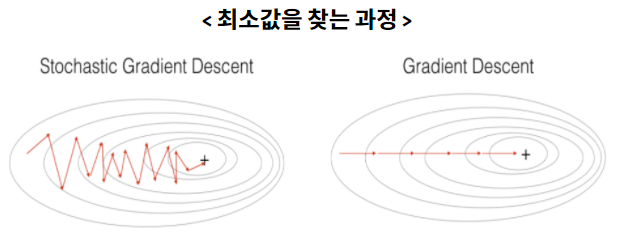
#### **점진적 학습 (= 온라인 학습)** = 산(경사)을 내려가는 것과 유사
- **확률적 경사 하강법** **Stochastic Gradient Descent**
- 확률적 : 무작위, 랜덤하게

=> 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 set에서 랜덤하게 고르는 방법
- 훈련 set에서 랜덤하게 하나의 sample을 선택하여 가파른 경사를 조금 내려간다.
- 그다음, 훈련 set에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다.
- 이 과정을 전체 sample을 모두 사용할 때까지 반복한다.
- if 모든 sample을 다 사용했는데도, 산을 다 내려오지 못한다면, 처음부터 다시 시작

#### **에포크 epoch** : 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정

-> **훈련 data가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 이어나갈 수 있기에, 다시 산꼭대기에서부터 시작할 필요가 없다.**

> in 신경망, 많은 data를 사용하기에, 한 번에 모든 data를 사용하기에 어렵고, 모델이 매우 복잡하기 때문에 수학적인 방법으로 해답을 얻기 어려움
=> 확률적 경사 하강법 이나 미니배치 경사 하강법을 사용함

### **Loss function 손실 함수 == Cost Function 비용 함수**
- 손실함수의 값은 작을 수록 모델의 성능이 좋다는 것인데, 어떤 값이 최솟값인지는 알 수 없다.
- 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고
인정해야함
- but, 자주 다루는 문제에 필요한 손실 함수는 이미 정의되어 있기에 괜찮다!
- 손실 함수는 미분 가능해야 함!!

#### **이진 분류 : 로지스틱 손실 함수, 이진 크로스 엔트로피 손실 함수**
- 타깃이 양성 클래스(1)일때 : -log(p)
- 타깃이 음성 클래스(0)일때 : -log(1-p)

#### **다중 분류 : 크로스 엔트로피 손실 함수**

- 회귀 : MSE 평균 제곱 오차 => 타깃에서 예측을 뺸 값을 제곱한 다음 모든 sample에 평균한 값

#### SGDClassifier
- tol 매개변수 : 반복을 멈출 조건
- n_iter_no_change 매개변수에서 지정한 epoch 동안 손실이 tol만틈 줄어들지 않으면 알고리즘이 중단

Scikit-learn의 SGDClassifier를 OvR(One-vs-Rest) 방식으로 사용할 때, 각 클래스에 대한 이진 분류자를 생성하여 하나의 클래스를 양성 클래스로 다른 클래스들을 음성 클래스로 분류합니다. 이진 분류자마다 클래스에 대한 판별 경계를 설정합니다.

기본적으로 SGDClassifier에서 어떤 클래스가 양성 클래스로 취급될지를 결정하는 특별한 파라미터나 코드는 제공되지 않습니다. 이것은 OvR 분류 방식의 핵심 개념입니다. 어떤 클래스가 양성 클래스로 간주될지는 내부적으로 알고리즘에 의해 자동으로 처리되며 각 클래스에 대해 독립적인 이진 분류자가 생성됩니다.

만약 특정 클래스를 양성 클래스로 지정하려면, 다음과 같이 SGDClassifier의 partial_fit 메서드를 사용하여 해당 클래스와 다른 모든 클래스에 대해 이진 분류자를 독립적으로 학습시킬 수 있습니다. 아래의 예제는 레이블이 1인 클래스를 양성 클래스로 지정하고 다른 클래스들과의 이진 분류자를 학습하는 방법을 보여줍니다:


```python
from sklearn.linear_model import SGDClassifier

# SGDClassifier 인스턴스 생성
classifier = SGDClassifier(loss='log', random_state=42)

# 클래스 1을 양성 클래스로 설정
positive_class = 1

# 데이터와 해당 클래스의 레이블을 준비
X, y = your_data, your_labels

# 클래스 1에 대한 이진 분류자 학습
classifier.partial_fit(X, y == positive_class, classes=[0, 1])
```

여기서 your_data는 데이터, your_labels는 클래스 레이블, positive_class는 양성 클래스로 지정할 클래스를 나타냅니다. 이렇게 하면 해당 클래스에 대한 이진 분류자가 독립적으로 학습되며 해당 클래스와 다른 모든 클래스에 대한 판별 경계를 설정하게 됩니다.

>'OvR' 방식을 사용할 때, 모델은 각 클래스를 다른 모든 클래스와 비교하여 양성 클래스와 음성 클래스로 분류합니다. 분류기는 각 클래스에 대한 이진 분류를 수행하므로 클래스 순서에 따라 첫 번째 클래스가 양성 클래스로 선택됩니다. 따라서 코드에서 classes 리스트에 나열된 클래스 중 첫 번째 클래스, 즉 'Bream'이 양성 클래스로 선택됩니다. 이러한 동작은 모델이 어떤 클래스를 양성 클래스로 인식하는지에 영향을 미치며, 다른 클래스를 양성 클래스로 인식하려면 classes 리스트에서 다른 순서로 클래스를 나열하거나, 모델을 다시 훈련시키는 과정에서 클래스 순서를 변경할 수 있습니다.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

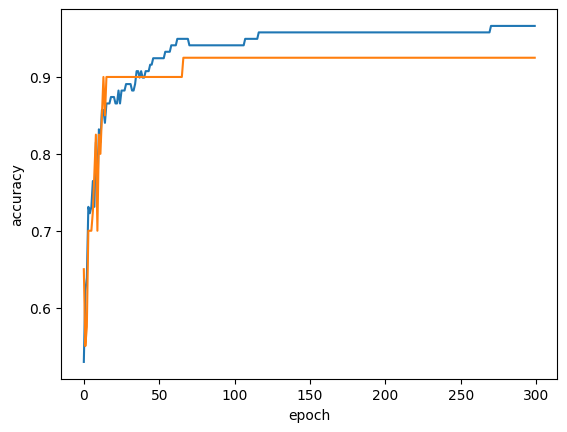

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
